In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import fm2p
import imgtools

Loading DLC 2.3.7...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


c:\Users\dmartins\anaconda3\envs\fm1\lib\site-packages\oasis\functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


# Make a mean projection of the benchtop axonal recording

In [4]:
imgpath = r'T:\axonal_imaging_LP\250319_DMM_DMM045_LPaxons\3x-003\3x-003_registered.tif'
regstack = imgtools.load_tif_stack(imgpath, doReg=False, doNorm=False)
# savepath, imgstack = imgtools.tif_convert(imgpath, ret=True)
# regstack, regextras = imgtools.register_stack_to_template(imgstack)

In [15]:
regstack.shape

(2424, 760, 760)

In [5]:
meanstack = np.max(regstack[:,:,:], 0)

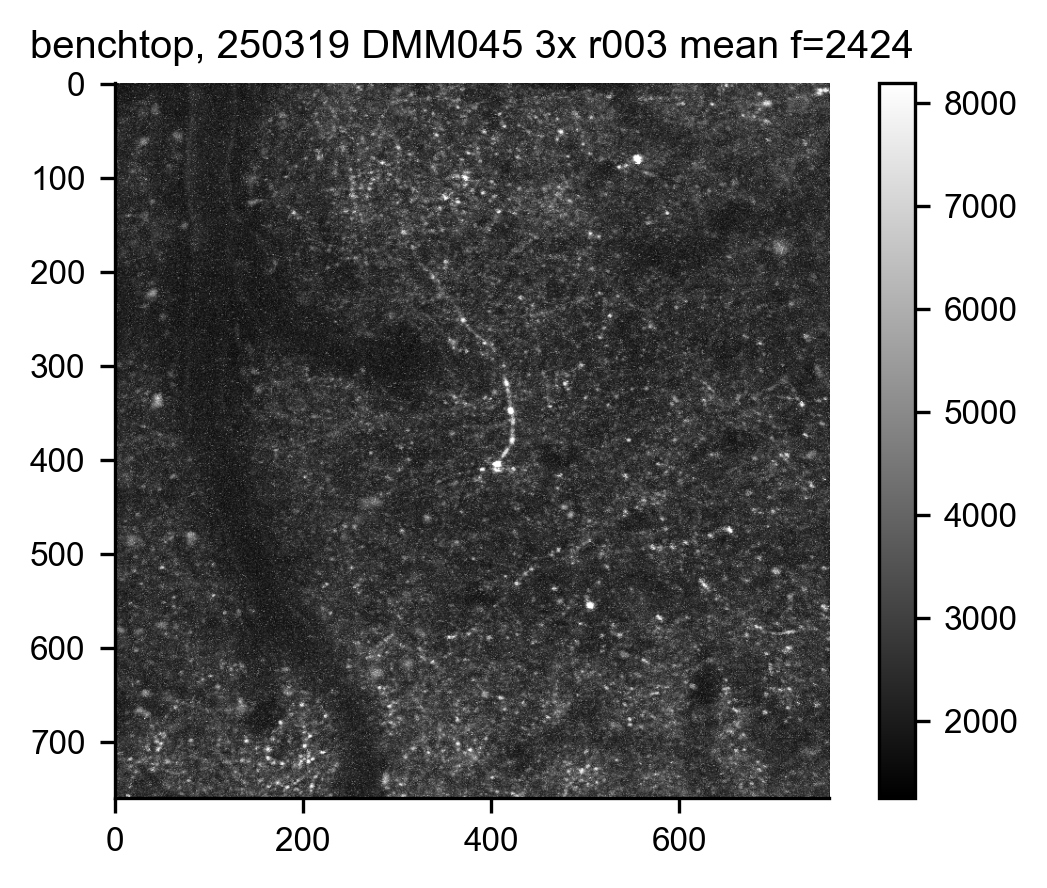

In [20]:
plt.figure(figsize=(3.8,3), dpi=300)
plt.imshow(meanstack, cmap='gray')
plt.title('benchtop, 250319 DMM045 3x r003 mean f=2424')
plt.colorbar()
plt.tight_layout()

# Mean projection of the mini2p data

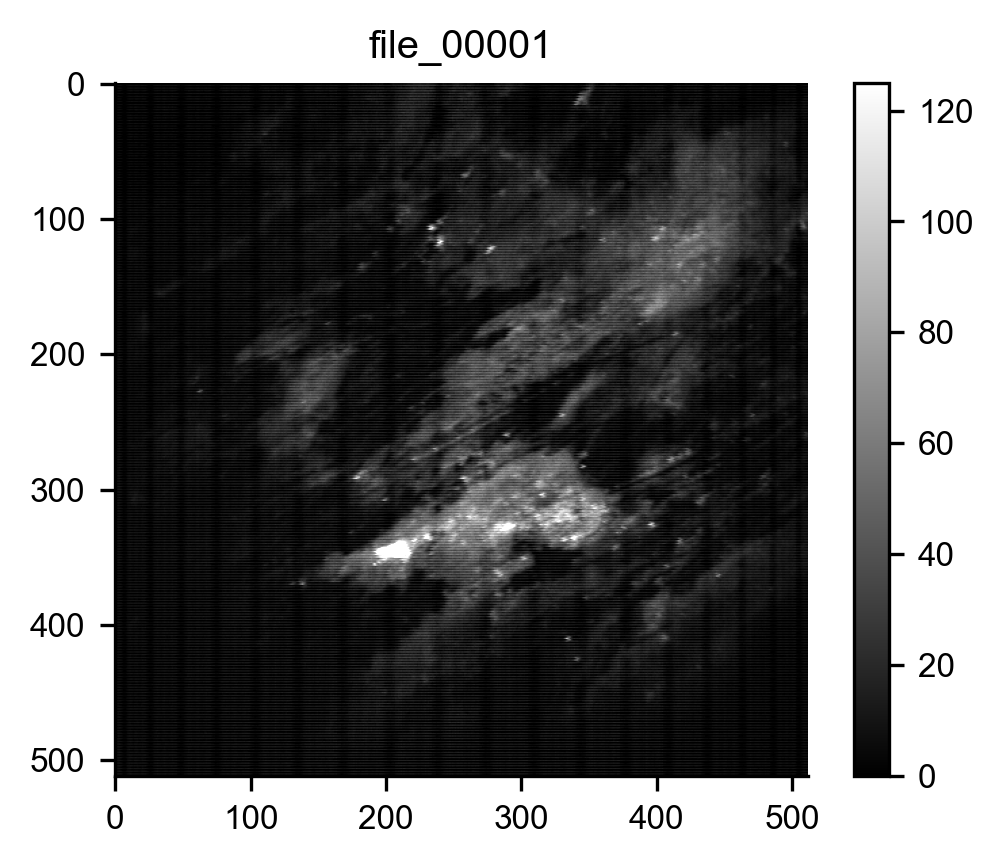

In [40]:
basepath = r'T:\axonal_imaging_LP\250420_DMM_DMM045_LPaxons'
imgname = 'file_00001.tif'
imgpath = os.path.join(basepath, imgname)
savepath = '{}_meanproj.png'.format(os.path.join(basepath, os.path.splitext(imgname)[0]))
imgstack = imgtools.load_tif_stack(imgpath, rotate=False, ds=1.0, doReg=False, doNorm=False)

stackmean = np.mean(imgstack, 0)

plt.figure(figsize=(4,3), dpi=300)
plt.imshow(stackmean, cmap='gray', vmin=0, vmax=125)
plt.colorbar()
plt.title(os.path.splitext(imgname)[0])
plt.savefig(savepath)

In [2]:
F_path = r'T:\axonal_imaging_LP\250420_DMM_DMM045_LPaxons\s2p_test\suite2p\plane0\F.npy'
Fneu_path = r'T:\axonal_imaging_LP\250420_DMM_DMM045_LPaxons\s2p_test\suite2p\plane0\F.npy'
iscell_path = r'T:\axonal_imaging_LP\250420_DMM_DMM045_LPaxons\s2p_test\suite2p\plane0\iscell.npy'
spks_path = r'T:\axonal_imaging_LP\250420_DMM_DMM045_LPaxons\s2p_test\suite2p\plane0\spks.npy'
F = np.load(F_path, allow_pickle=True)
Fneu = np.load(Fneu_path, allow_pickle=True)
spks = np.load(spks_path, allow_pickle=True)
iscell = np.load(iscell_path, allow_pickle=True)

In [3]:
twop_recording = fm2p.TwoP('','')
twop_recording.add_data(
    F=F,
    Fneu=Fneu,
    spikes=spks,
    iscell=iscell
)
twop_dict = twop_recording.calc_dFF(neu_correction=0.7, oasis=False)

In [7]:
twop_dict['norm_dFF'].shape

(36, 1000)

In [20]:
twop_dict.keys()

dict_keys(['raw_F0', 'norm_F0', 'raw_F', 'norm_F', 'raw_Fneu', 'raw_dFF', 'norm_dFF', 'oasis_spks', 's2p_spks'])

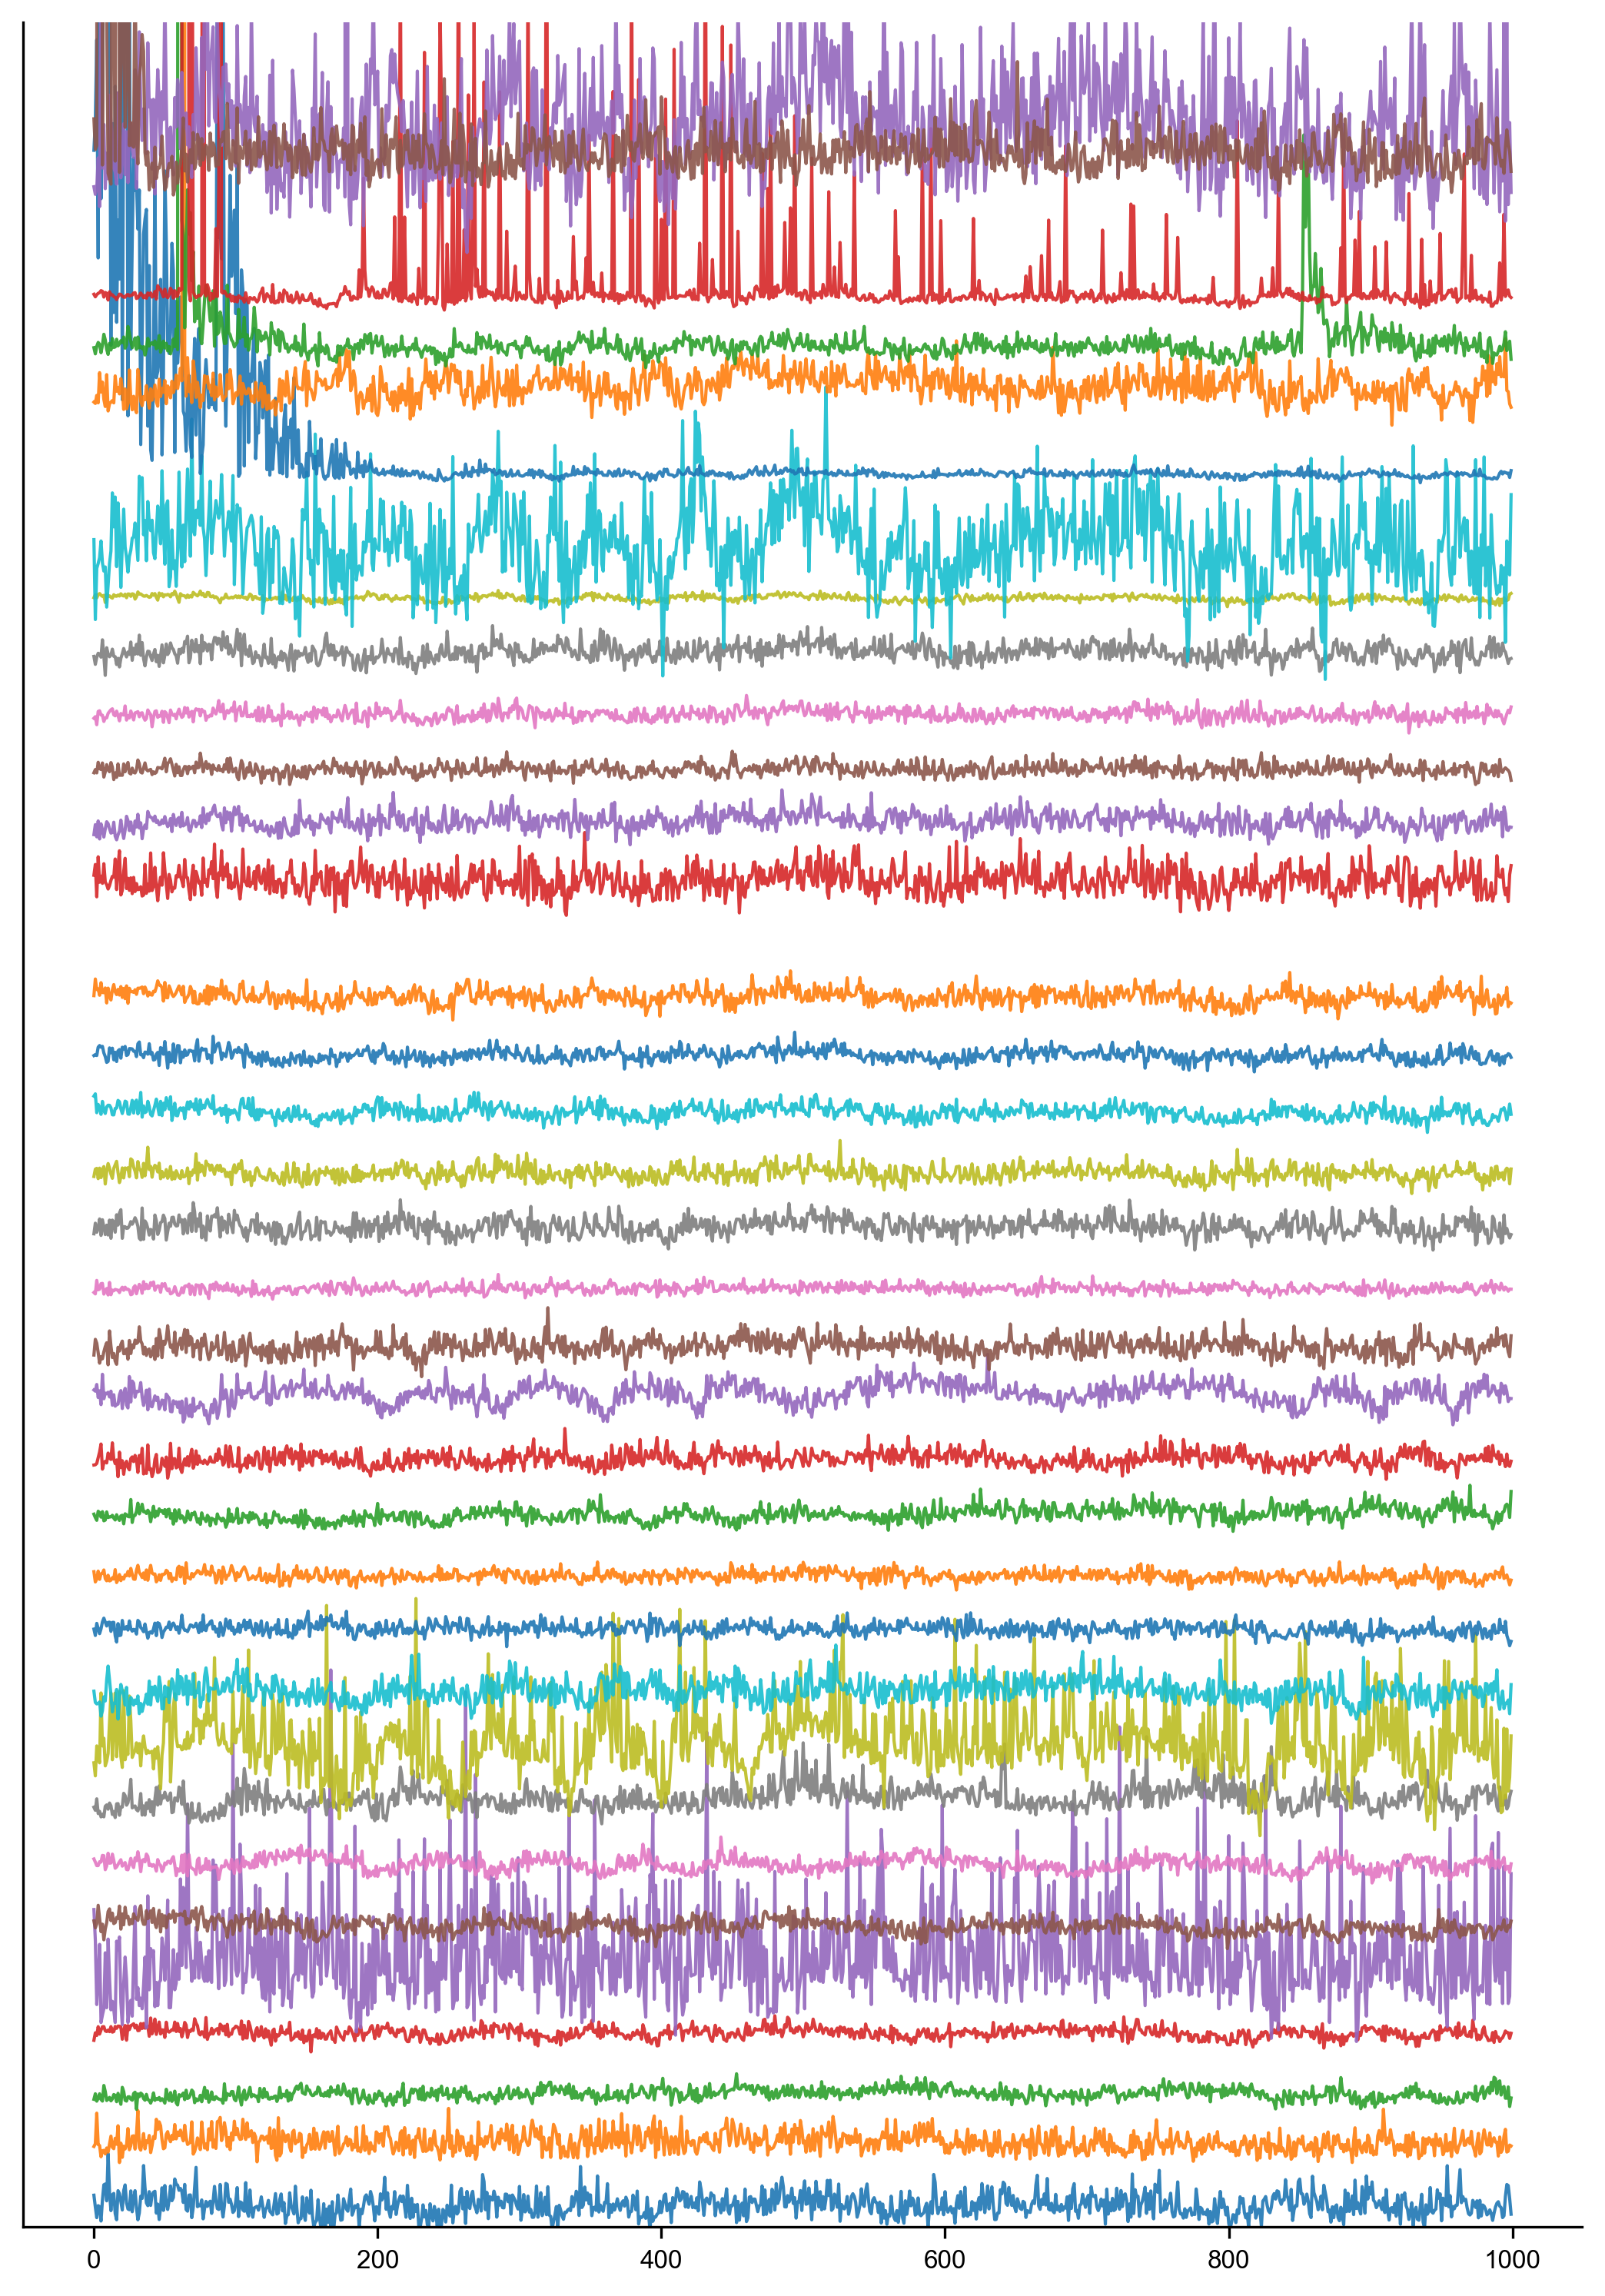

In [31]:
scale = 100
norm_dFF = twop_dict['norm_dFF']
fig, ax = plt.subplots(1,1, figsize=(7,10), dpi=300)
for cell in range(36):
    ax.plot(norm_dFF[cell,:] + (cell*scale), lw=1, alpha=0.9)
ax.set_yticks([])
ax.set_ylim([-30,3800])
fig.tight_layout()

In [50]:
img = imgtools.load_tif_stack(
    r'T:\axonal_imaging_LP\250420_DMM_DMM045_LPaxons\file_00003.tif',
    doReg=False,
    doNorm=False
)

In [51]:
def rolling_average_3d(arr, window=5):
    shape = (arr.shape[0] - window + 1, window) + arr.shape[1:]
    strides = (arr.strides[0],) + arr.strides
    windows = np.lib.stride_tricks.as_strided(arr, shape=shape, strides=strides)
    return windows.mean(axis=1)

In [52]:
img_rollavg = rolling_average_3d(img)

In [53]:
img.shape, img_rollavg.shape

((1000, 512, 512), (996, 512, 512))

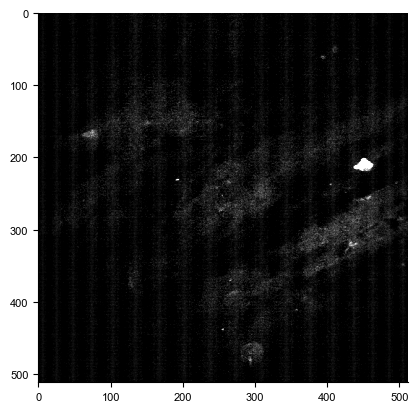

In [54]:
plt.imshow(img_rollavg[150,:,:], cmap='gray', vmin=0, vmax=400)

In [48]:
from tqdm import tqdm

In [57]:
plot_stack = []
for f in tqdm(range(np.size(img_rollavg,0))):
    fig = plt.figure(dpi=300, figsize=(4,4))
    plt.imshow(img_rollavg[f,:,:], cmap='gray', vmin=0, vmax=400)
    plt.axis('off')
    plt.tight_layout()
    plot_stack.append(imgtools.fmt_figure(fig))
plot_stack = np.array(plot_stack)
imgtools.write_animation(
    plot_stack,
    r'T:\axonal_imaging_LP\250420_DMM_DMM045_LPaxons\f03_demo_vid_30Hz_win5_v02.mp4',
    30
)

100%|██████████| 996/996 [01:52<00:00,  8.88it/s]


Writing MP4 file.


100%|██████████| 996/996 [00:08<00:00, 114.85it/s]

Video written to T:\axonal_imaging_LP\250420_DMM_DMM045_LPaxons\f03_demo_vid_30Hz_win5_v02.mp4


In [56]:
7.5*4

30.0